In [ ]:
!unzip archive.zip

In [14]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

merged_df = pd.concat([train_df, test_df], ignore_index=True)

In [15]:
display(merged_df.info())
display(merged_df.head())
display(merged_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 91933 non-null  object 
 1   VIN (1-10)                                         91933 non-null  object 
 2   County                                             91925 non-null  object 
 3   City                                               91921 non-null  object 
 4   State                                              91920 non-null  object 
 5   ZIP Code                                           91924 non-null  float64
 6   Model Year                                         91922 non-null  float64
 7   Make                                               91926 non-null  object 
 8   Model                                              91916 non-null  object 
 9   Electr

None

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,91924.000000,91922.000000,91933.000000,91933.000000,91694.000000,9.193300e+04
mean,98143.768211,2018.184646,106.913774,2516.637606,29.943988,1.973953e+08
std,2837.753228,2.723974,104.047660,12251.344914,14.654830,1.071776e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372025e+08
50%,98119.000000,2018.000000,73.000000,0.000000,34.000000,1.754096e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299994e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.792548e+08


In [44]:
relevant_columns = [
    'Make',                    # Brand of the EV (e.g., Tesla, Nissan)
    'Model',                   # Model name (e.g., Model 3, Leaf)
    'Model Year',              # Manufacturing year — newer cars cost more
    'Electric Vehicle Type',   # BEV or PHEV (type affects price)
    'Electric Range',          # Driving range — key numeric feature
    'State',                   # Region can slightly influence pricing
    'Base MSRP' ,               # 🎯 Target variable (price)
    'City',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility',

]


print("Relevant columns for predicting EV prices:")
for col in relevant_columns:
    print(f"- {col}")

Relevant columns for predicting EV prices:
- Make
- Model
- Model Year
- Electric Vehicle Type
- Electric Range
- State
- Base MSRP
- City
- Clean Alternative Fuel Vehicle (CAFV) Eligibility


In [45]:
columns_to_drop = [col for col in merged_df.columns if col not in relevant_columns]
merged_df = merged_df.drop(columns=columns_to_drop)
display(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 90068 entries, 0 to 91932
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   90068 non-null  object 
 1   State                  90068 non-null  object 
 2   Model Year             90068 non-null  float64
 3   Make                   90068 non-null  object 
 4   Model                  90068 non-null  object 
 5   Electric Vehicle Type  90068 non-null  object 
 6   Electric Range         90068 non-null  int64  
 7   Base MSRP              90068 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 6.2+ MB


None

In [46]:
import pandas as pd
import numpy as np

print("Missing values before handling:\n", merged_df.isna().sum())

num_cols = merged_df.select_dtypes(include=[np.number]).columns
merged_df[num_cols] = merged_df[num_cols].apply(lambda x: x.fillna(x.median()))

cat_cols = merged_df.select_dtypes(include=['object']).columns
merged_df[cat_cols] = merged_df[cat_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

print("\nMissing values after handling:\n", merged_df.isna().sum())

Missing values before handling:
 City                     0
State                    0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
Electric Range           0
Base MSRP                0
dtype: int64

Missing values after handling:
 City                     0
State                    0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
Electric Range           0
Base MSRP                0
dtype: int64


In [47]:
import numpy as np

# Identify categorical and numerical columns
categorical_cols = merged_df.select_dtypes(include='object').columns
numerical_cols = merged_df.select_dtypes(include=np.number).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

Categorical columns: ['City', 'State', 'Make', 'Model', 'Electric Vehicle Type']
Numerical columns: ['Model Year', 'Electric Range', 'Base MSRP']


In [48]:


# Feature Engineering
CURRENT_YEAR = 2025

merged_df['Model Year'] = merged_df['Model Year'].astype(int)
merged_df['EV_Age'] = CURRENT_YEAR - merged_df['Model Year']
merged_df['Price_per_Mile'] = merged_df['Base MSRP'] / merged_df['Electric Range']

# Replace infinite values (if Electric Range = 0) and fill missing with median
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df['Price_per_Mile'].fillna(merged_df['Price_per_Mile'].median(), inplace=True)

# Outlier Handling
initial_count = merged_df.shape[0]

# Remove invalid or zero prices
merged_df = merged_df[merged_df['Base MSRP'] > 0]

# Remove top 0.1% extreme high prices
upper_limit = merged_df['Base MSRP'].quantile(0.999)
merged_df = merged_df[merged_df['Base MSRP'] <= upper_limit]

print(f"Removed {initial_count - merged_df.shape[0]} extreme/invalid rows.")
print(f"New dataset shape: {merged_df.shape}")

# Preview feature-engineered columns
merged_df[['Model Year', 'EV_Age', 'Electric Range', 'Base MSRP', 'Price_per_Mile']].head()


Removed 85752 extreme/invalid rows.
New dataset shape: (4316, 10)


/tmp/ipython-input-3194410542.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Price_per_Mile'].fillna(merged_df['Price_per_Mile'].median(), inplace=True)


,Model Year,EV_Age,Electric Range,Base MSRP,Price_per_Mile
5,2016,9,27,34600,1281.481481
24,2018,7,111,33950,305.855856
46,2019,6,32,39995,1249.843750
72,2016,9,27,34600,1281.481481
82,2019,6,17,34995,2058.529412


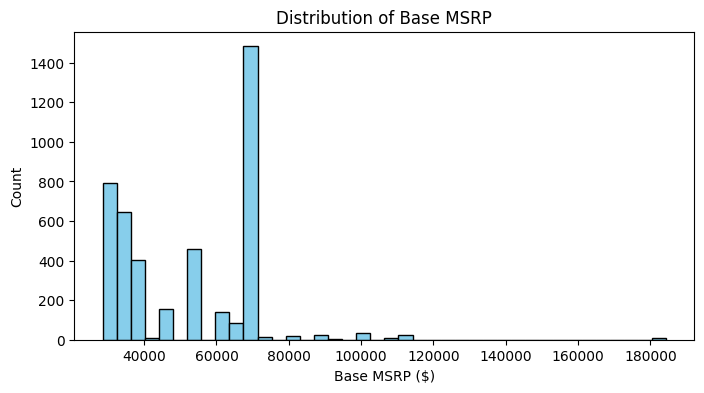

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(merged_df['Base MSRP'], bins=40, color='skyblue', edgecolor='black')
plt.title("Distribution of Base MSRP")
plt.xlabel("Base MSRP ($)")
plt.ylabel("Count")
plt.show()


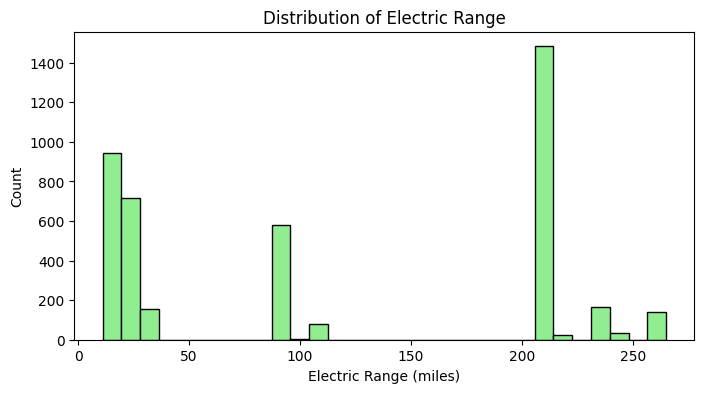

In [50]:
plt.figure(figsize=(8,4))
plt.hist(merged_df['Electric Range'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Count")
plt.show()


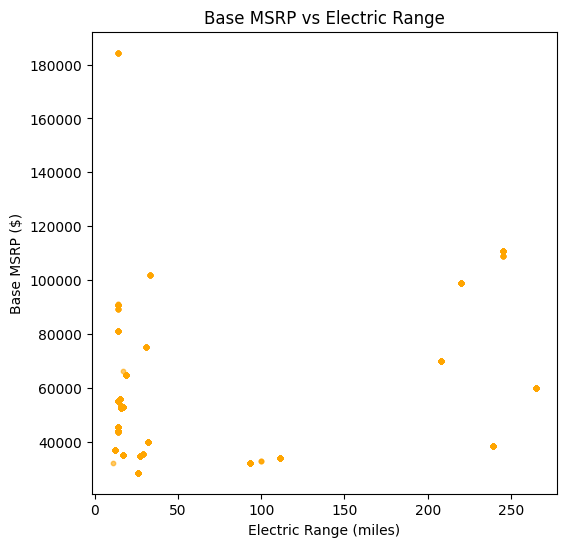

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(merged_df['Electric Range'], merged_df['Base MSRP'], s=10, alpha=0.6, color='orange')
plt.title("Base MSRP vs Electric Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Base MSRP ($)")
plt.show()


/tmp/ipython-input-1260864260.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=ev_types, patch_artist=True)


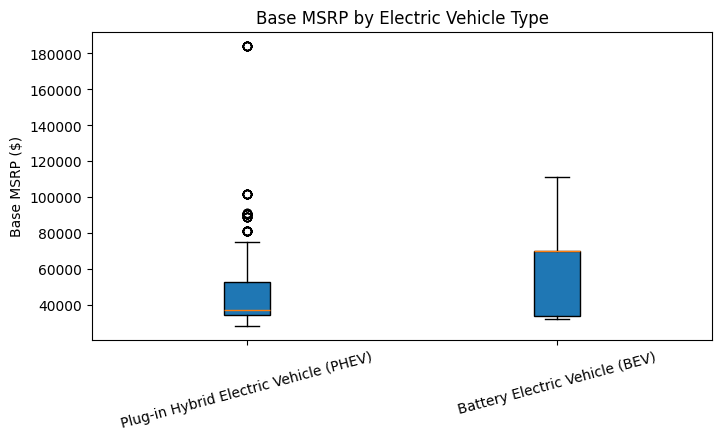

In [52]:
plt.figure(figsize=(8,4))
ev_types = merged_df['Electric Vehicle Type'].unique()
data_to_plot = [merged_df.loc[merged_df['Electric Vehicle Type'] == t, 'Base MSRP'] for t in ev_types]
plt.boxplot(data_to_plot, labels=ev_types, patch_artist=True)
plt.title("Base MSRP by Electric Vehicle Type")
plt.ylabel("Base MSRP ($)")
plt.xticks(rotation=15)
plt.show()


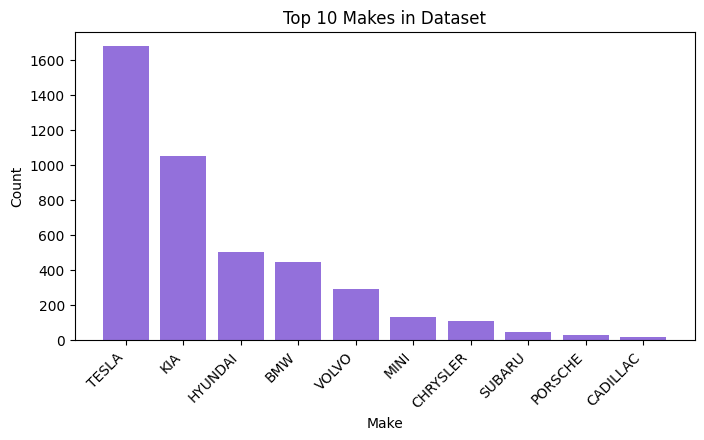

In [53]:
top_makes = merged_df['Make'].value_counts().nlargest(10)
plt.figure(figsize=(8,4))
plt.bar(top_makes.index, top_makes.values, color='mediumpurple')
plt.title("Top 10 Makes in Dataset")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.show()


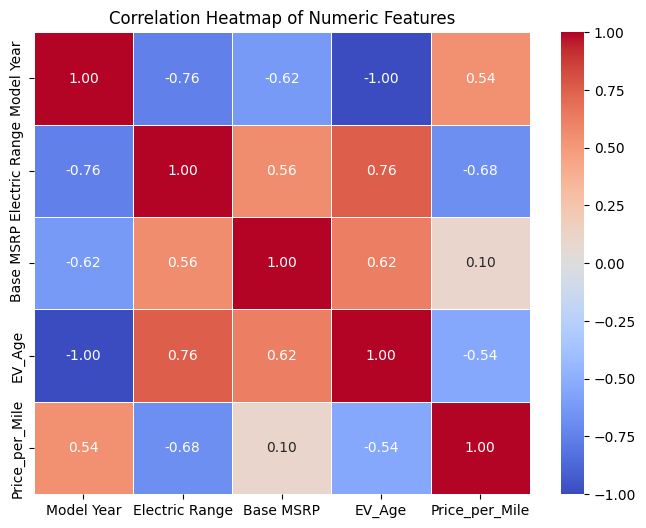

In [55]:
import seaborn as sns

numeric_df = merged_df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

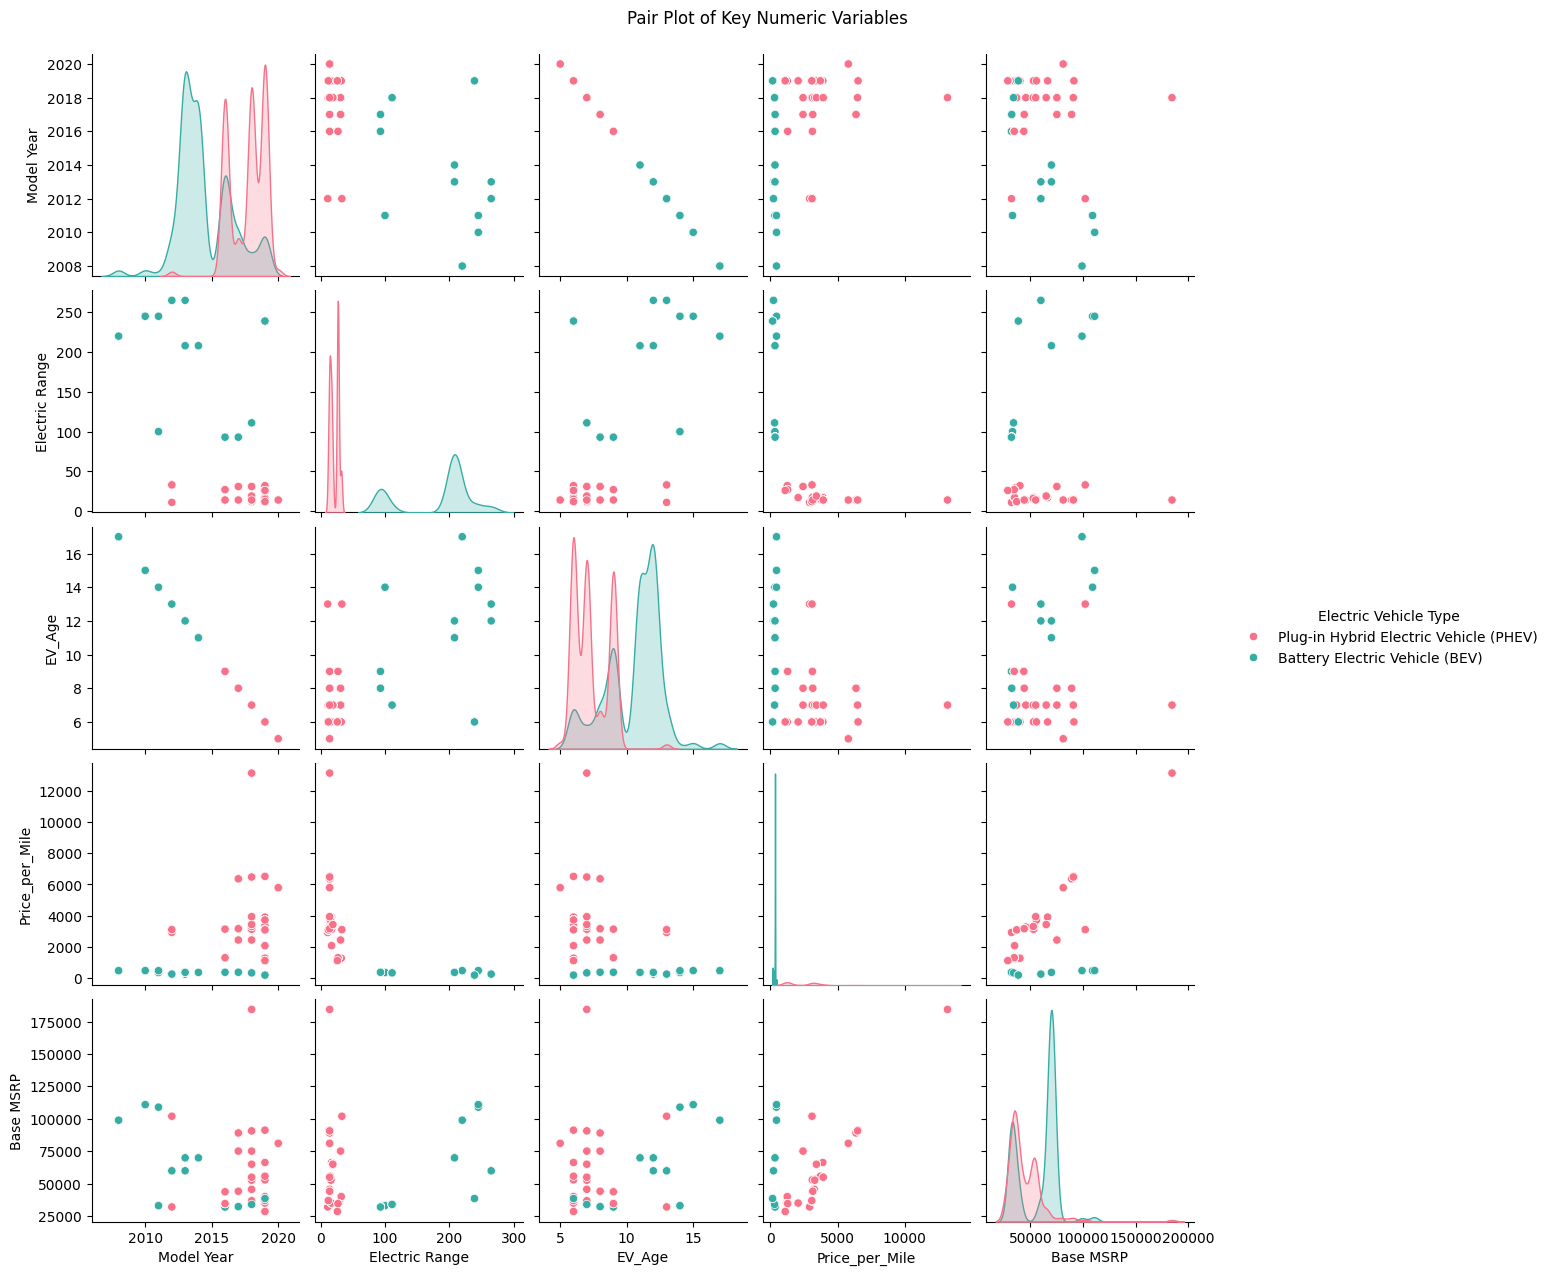

In [56]:
sns.pairplot(
    merged_df,
    vars=['Model Year', 'Electric Range', 'EV_Age', 'Price_per_Mile', 'Base MSRP'],
    hue='Electric Vehicle Type',
    diag_kind='kde',
    palette='husl'
)
plt.suptitle("Pair Plot of Key Numeric Variables", y=1.02)
plt.show()

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# --- Cardinality Reduction ---
TOP_K_MAKE = 10
TOP_K_CITY = 20

merged_df['Make_top'] = merged_df['Make'].where(
    merged_df['Make'].isin(merged_df['Make'].value_counts().nlargest(TOP_K_MAKE).index),
    '__OTHER__'
)

merged_df['City_top'] = merged_df['City'].where(
    merged_df['City'].isin(merged_df['City'].value_counts().nlargest(TOP_K_CITY).index),
    '__OTHER__'
)

# --- Frequency Encoding for 'Model' ---
merged_df['Model_freq'] = merged_df['Model'].map(merged_df['Model'].value_counts(normalize=True))

# --- Define Features and Target ---
features = [
    'Make_top', 'Model_freq', 'Model Year', 'Electric Vehicle Type',
    'Electric Range', 'State', 'City_top', 'EV_Age', 'Price_per_Mile'
]
target = 'Base MSRP'

X = merged_df[features].copy()
y = merged_df[target].copy()

# --- Identify Categorical and Numerical Columns ---
categorical_cols = ['Make_top', 'Electric Vehicle Type', 'State', 'City_top']
numerical_cols = ['Model Year', 'Electric Range', 'EV_Age', 'Price_per_Mile', 'Model_freq']

# --- Split into Train and Test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# --- Build Preprocessing Pipelines ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='__MISSING__')),
    # ✅ Updated parameter for sklearn >=1.2
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)

# --- Fit and Transform the Data ---
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print("Transformed train shape:", X_train_prep.shape)
print("Transformed test shape:", X_test_prep.shape)


Train shape: (3452, 9) Test shape: (864, 9)
Transformed train shape: (3452, 40)
Transformed test shape: (864, 40)


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import sparse
import joblib
import numpy as np

if sparse.issparse(X_train_prep):
    X_train_arr = X_train_prep.toarray()
    X_test_arr  = X_test_prep.toarray()
else:
    X_train_arr = X_train_prep
    X_test_arr  = X_test_prep

rf_model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train_arr, y_train)

y_pred = rf_model.predict(X_test_arr)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)            # MSE (no squared kwarg)
rmse = np.sqrt(mse)                                  # RMSE computed manually
r2   = r2_score(y_test, y_pred)

print(f"RandomForest Results:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.4f}")

joblib.dump({'model': rf_model, 'preprocessor': preprocessor}, "/content/ev_price_model_and_preprocessor.joblib")
print("Saved model and preprocessor to /content/ev_price_model_and_preprocessor.joblib")

try:
    num_names = numerical_cols
    cat_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols).tolist()
    feature_names = num_names + cat_names
    importances = rf_model.feature_importances_
    top10 = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:10]
    print("\nTop 10 feature importances:")
    for name, imp in top10:
        print(f"{name}: {imp:.4f}")
except Exception:
    print("Could not retrieve feature names for importances (sklearn version or transformer shape).")

RandomForest Results:
MAE: 54.15
RMSE: 961.54
R²: 0.9976
Saved model and preprocessor to /content/ev_price_model_and_preprocessor.joblib

Top 10 feature importances:
Model Year: 0.3244
Price_per_Mile: 0.3056
EV_Age: 0.2582
Model_freq: 0.0680
Make_top_CADILLAC: 0.0190
Make_top_TESLA: 0.0149
Electric Range: 0.0065
Make_top_VOLVO: 0.0013
City_top_OLYMPIA: 0.0009
Electric Vehicle Type_Plug-in Hybrid Electric Vehicle (PHEV): 0.0002
